In [5]:
%reload_ext autoreload
%autoreload 2

In [147]:
%%file plot.py
import matplotlib.pyplot as plt
import numpy as np
import inspect

def _getFigsize( shape, plotsize ):
    """
    Gets figsize given shape and plotsize (elementwise mutliplication)
    """
    return np.array( plotsize ) * np.array( [ shape[ 1 ], shape[ 0 ] ] )

def _subplots( fig, shape ):
    subplots = fig.subplots( shape[ 0 ], shape[ 1 ] )
    if shape[ 0 ] == 1 and shape[ 1 ] == 1:
        subplots = np.array( [[ subplots ]] )
    elif shape[ 0 ] == 1:
        subplots = subplots[ None, ... ]
    elif shape[ 1 ] == 1:
        subplots = subplots[ ..., None ]
    return subplots

def plotImageGrid( images, plotsize=( 3, 3 ) ):
    """
    Plots a grid of images. Assumes the first two ranks of the shape are the grid, the next two are image size, and the last is channels
    ie:
    shape=( rows, columns, width, height, channels )
    
    Channels is not required if 1
    """
    shape = images.shape[ 0:2 ]

    if images.shape[ -1 ] == 1:
        images = np.squeeze( images, -1 )

    figsize = _getFigsize( shape, plotsize )

    fig = plt.figure( figsize=figsize ) 
    rows = _subplots( fig, shape )
    for row_i, row in enumerate( rows ):
        for column_i, subplot in enumerate( row ):
            subplot.axis( 'off' )
            subplot.imshow( images[ row_i, column_i ] )

def plotImageGridFunc( func, shape, plotsize=( 3, 3 ) ):
    figsize = _getFigsize( shape, plotsize )

    fig = plt.figure( figsize=figsize )
    rows = _subplots( fig, shape )
    args = inspect.getargspec( func ).args
    for row_i, row in enumerate( rows ):
        for column_i, subplot in enumerate( row ):
            subplot.axis( 'off' )
            if len( args ) == 2:
                image = func( row_i, column_i )
            else:
                image = func()

            if image is None:
                continue

            if image.shape[ -1 ] == 1:
                image = np.squeeze( image, -1 )
                
            subplot.imshow( image )

Overwriting plot.py


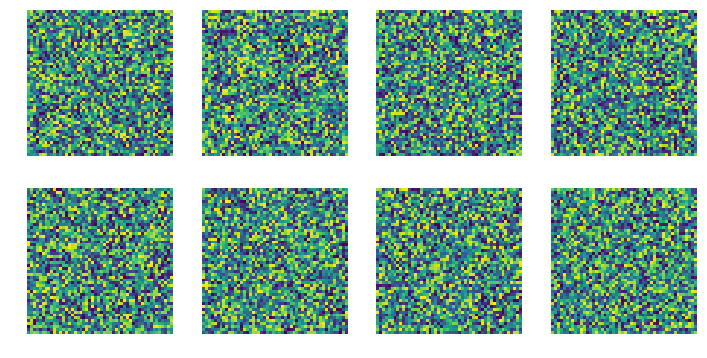

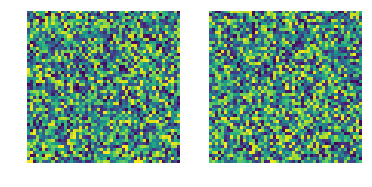

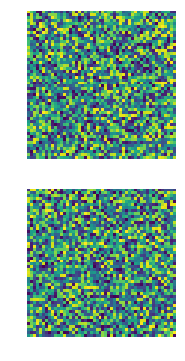

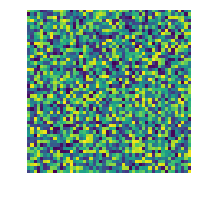

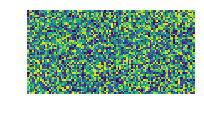

In [148]:
import numpy as np

import plot

images = np.random.rand( 2, 4, 50, 50, 1 )
plot.plotImageGrid( images )

def getRandomImage( _r, _c ):
    return np.random.rand( 50, 50, 1 )

def getRandomImageNoargs():
    return np.random.rand( 50, 100, 1 )

plot.plotImageGridFunc( getRandomImage, ( 1, 2 ) )
plot.plotImageGridFunc( getRandomImage, ( 2, 1 ) )
plot.plotImageGridFunc( getRandomImage, ( 1, 1 ) )
plot.plotImageGridFunc( getRandomImageNoargs, ( 1, 1 ) )